In [1]:
!pwd

/Users/yibeihu/BestBuy_sales_forecast


In [30]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version
sys.path.append("../../")

from src.hmm import sku_predict
from src.utils import *
import pickle
import itertools

from tqdm import tqdm
from IPython.utils import io
from joblib import Parallel, delayed

pd.options.mode.chained_assignment = None

## Get all SKUs using HMM

In [6]:
with open('./data/final_sku_model_map.pkl', 'rb') as handle:
    sku_period_dict1 = pickle.load(handle)

In [8]:
# extract SKU keys using HMM model to forecast
hmm_keys = ['rmse_du_15', 'rmse_du_30', 'rmse_du_45', 'rmse_du_60', 'rmse_du_90', 'rmse_du_max']
hmm_skus = [sku_period_dict1[sub_model] for sub_model in hmm_keys]
hmm_skus = list(itertools.chain.from_iterable(hmm_skus))

hmm_skus = list(set(hmm_skus))

## Prepare Data for training

In [12]:
# Load in data for training
original_train = pd.read_csv("./data/train_validation_marker.csv")
original_train["SALES_DATE"] = pd.to_datetime(original_train["SALES_DATE"])

Text(0, 0.5, '# SKU')

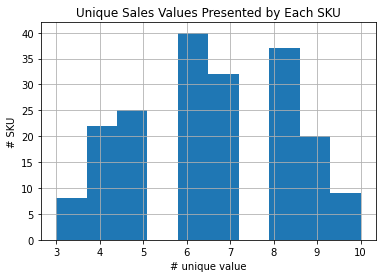

In [17]:
# Using a 90 day for HMM training.
sku_in_scope = original_train[(original_train.Encoded_SKU_ID.isin(hmm_skus)) &(original_train.SALES_DATE>="2022-03-15"\
                         )].groupby("Encoded_SKU_ID")["DAILY_UNITS"].nunique()

sku_in_scope.hist()
plt.title('Unique Sales Values Presented by Each SKU')
plt.xlabel('# unique value')
plt.ylabel('# SKU')

## Test Using 1 SKU

In [19]:
# Construct a dummy df validation set
date_range = pd.date_range(start='08/01/2022', end='08/07/2022')
dummy_forecast = pd.DataFrame(index=date_range)

In [31]:
#Specify the SKU and # of Gaussian Mixtures to construct model
sku_id = 1
n_comps = max(sku_in_scope[sku_id],10) #Limit to max 10 components

#Initialize the model parameters
sku_pred_model = sku_predict(original_train, sku_id)

#train the model for this SKU
feats_sku = sku_pred_model.get_features(n_lags=2)
train1, _ = sku_pred_model.split_train_test("2022-07-31")
valid1 = dummy_forecast
sku_pred_model.fit_hmm(train1, "2022-03-01", n_components1=n_comps)

Created 2 lag features
Training on : ['DAILY_UNITS_lag1', 'DAILY_UNITS_lag2'] ['change_lag1', 'change_lag2']


In [32]:
sku_pred_model.predict(valid1, 15)

Starting Prediction
-----> Predicting for day:0


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 179 free scalar parameters with only 60 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


-----> Predicting for day:1


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 179 free scalar parameters with only 60 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


-----> Predicting for day:2


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 179 free scalar parameters with only 60 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


-----> Predicting for day:3


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 179 free scalar parameters with only 60 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


-----> Predicting for day:4


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 179 free scalar parameters with only 60 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


-----> Predicting for day:5


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Fitting a model with 179 free scalar parameters with only 60 data points will result in a degenerate solution.
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


-----> Predicting for day:6


,DAILY_UNITS_lag1,DAILY_UNITS_lag2,change_lag1,change_lag2,predicted1,predicted2,predicted
2022-08-01,1.0,1.0,0.0,0.0,1.0,1.0,1.00
2022-08-02,0.0,1.0,2.0,1.0,2.0,2.0,2.00
2022-08-03,2.0,0.0,-1.0,1.0,1.0,1.0,1.00
2022-08-04,2.0,2.0,-1.0,-2.0,1.0,0.0,0.55
2022-08-05,0.0,1.0,0.0,-1.0,0.0,0.0,0.00
2022-08-06,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2022-08-07,0.0,0.0,1.0,1.0,1.0,1.0,1.00


## Parallel training for Batch

In [26]:
# Create an error df to store error values
date_range = pd.date_range(start='08/01/2022', end='08/07/2022')
error_prediction = pd.DataFrame(index=date_range)
error_prediction["predicted"] = np.nan
# error_prediction

In [27]:
def parallel_hmm_function(sku_id):
    n_comps = max(sku_in_scope[sku_id],10) #Limit to max 10 components
    sku_pred_model = sku_predict(original_train, sku_id)
    with io.capture_output() as captured:
        feats_sku = sku_pred_model.get_features(n_lags=2)
        train1, _ = sku_pred_model.split_train_test("2022-07-31")
        valid1 = dummy_forecast
        sku_pred_model.fit_hmm(train1, "2022-03-01", n_components1=n_comps)
        try:
            sku_pred_15 = sku_pred_model.predict(valid1, 15)
        except:
            sku_pred_15 = error_prediction
            print(f"Error for {sku_id} 15")
        try:
            sku_pred_30 = sku_pred_model.predict(valid1, 30)
        except:
            sku_pred_30 = error_prediction
            print(f"Error for {sku_id} 30")
        try:
            sku_pred_45 = sku_pred_model.predict(valid1, 45)
        except:
            sku_pred_45 = error_prediction
            print(f"Error for {sku_id} 45")
        try:
            sku_pred_60 = sku_pred_model.predict(valid1, 60)
        except:
            sku_pred_60 = error_prediction
            print(f"Error for {sku_id} 60")
        try:
            sku_pred_90 = sku_pred_model.predict(valid1, 90)
        except:
            sku_pred_90 = error_prediction
            print(f"Error for {sku_id} 90")
        try:
            sku_pred_max = sku_pred_model.predict(valid1, sku_pred_model.X.shape[0])
        except:
            sku_pred_max = error_prediction
            print(f"Error for {sku_id} max")
        merge0 = sku_pred_15[["predicted"]].merge(sku_pred_30[["predicted"]], left_index=True, \
                                                  right_index=True, suffixes=("", "_30"))
        merge1 = merge0.merge(sku_pred_45[["predicted"]], left_index=True, \
                              right_index=True, suffixes=("", "_45"))
        merge2 = merge1.merge(sku_pred_60[["predicted"]], left_index=True, \
                              right_index=True, suffixes=("", "_60"))
        merge3 = merge2.merge(sku_pred_90[["predicted"]], left_index=True, \
                              right_index=True, suffixes=("", "_90"))
        merge4 = merge3.merge(sku_pred_max[["predicted"]], left_index=True, \
                              right_index=True, suffixes=("", "_max"))
        merge4["Encoded_SKU_ID"] = [sku_id] * merge4.shape[0]
        print(f"prediction successful for {sku_id}")
        return(merge4,captured)

In [37]:
all_preds = Parallel(n_jobs=3)(delayed(parallel_hmm_function)(sku_id) \
                               for sku_id in tqdm(sku_in_scope.index[:30]))



  0%|          | 0/30 [00:00<?, ?it/s]

 20%|██        | 6/30 [01:07<04:30, 11.26s/it]

 30%|███       | 9/30 [02:38<05:57, 17.02s/it]

 40%|████      | 12/30 [06:19<10:11, 33.99s/it]

 50%|█████     | 15/30 [08:20<08:58, 35.88s/it]

 60%|██████    | 18/30 [10:55<08:07, 40.65s/it]

 70%|███████   | 21/30 [12:07<05:20, 35.63s/it]

 80%|████████  | 24/30 [14:15<03:46, 37.70s/it]

 90%|█████████ | 27/30 [15:01<01:32, 30.98s/it]

100%|██████████| 30/30 [17:03<00:00, 34.12s/it]


In [38]:
hmm_result = pd.concat([x[0] for x in all_preds])
hmm_result.to_csv(f"./data/hmm_result_final_0_30.csv")